#📌 Extracción

In [1]:
# Importar las librerías necesarias para el análisis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
# Importar el dataset TelecomX
telecom = pd.read_json('TelecomX_Data.json')
telecom.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


In [3]:
# Contar el total de filas y columnas
telecom.shape

(7267, 6)

In [4]:
# Información sobre el dataset
telecom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


#🔧 Transformación

##### NORMALIZACION DE COLUMNAS ANIDADAS

In [5]:
columnas = list(telecom.columns)
columnas

['customerID', 'Churn', 'customer', 'phone', 'internet', 'account']

In [6]:
# Normalizar columnas anidadas que se encuentran en el dataframe

customer_telecom = pd.json_normalize(telecom['customer'])
phone_telecom = pd.json_normalize(telecom['phone'])
internet_telecom = pd.json_normalize(telecom['internet'])
account_telecom = pd.json_normalize(telecom['account'])


In [7]:
# Eliminar las columnas del dataframe visualizado al Importar el dataset TelecomX

telecom.drop(columns=['customer', 'phone', 'internet', 'account'], inplace=True)

In [8]:
# Expandir el dataframe telecom con las nuevas columnas normalizadas y  visualizar los cambios
telecom = pd.concat([telecom, customer_telecom, phone_telecom, internet_telecom, account_telecom], axis=1)
telecom.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [9]:
# Numeros de columnas y filas
telecom.shape

(7267, 21)

##### ✅ Consultar el diccionario para comprender mejor el significado de las variables.

In [10]:
# Imprimir todas las columnas del dataframe telecom con sus respectivos nombres
telecom.columns

Index(['customerID', 'Churn', 'gender', 'SeniorCitizen', 'Partner',
       'Dependents', 'tenure', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'Charges.Monthly',
       'Charges.Total'],
      dtype='object')

In [11]:
# Renombrar las columnas y verificar los cambios realizados
telecom = telecom.rename(columns = {
    'customerID':'Cliente_id',
    'Churn':'Cancelacion',
    'gender':'Genero',
    'SeniorCitizen':'Adulto_mayor',
    'Partner':'Tiene_pareja',
    'Dependents':'Tiene_dependientes',
    'tenure':'Meses_conectado',
    'PhoneService':'Servicio_telefono',
    'MultipleLines':'Lineas_multiples',
    'InternetService':'Servicio_internet',
    'OnlineSecurity':'Seguridad_en_linea',
    'OnlineBackup':'Respaldo_en_linea',
    'DeviceProtection':'Proeteccion_dispositivo',
    'TechSupport':'Soporte_tecnico',
    'StreamingTV':'TV_streaming',
    'StreamingMovies':'Peliculas_streaming',
    'Contract':'Tipo_contrato',
    'PaperlessBilling':'Factura_electronica',
    'PaymentMethod':'Metodo_pago',
    'Charges.Monthly':'Cargos_mensuales',
    'Charges.Total':'Cargos_totales'
})


####  ✅ Explorar las columnas del dataset y verificar sus tipos de datos.

In [12]:
# Observacion de la informacion del dataframe deacuerdo a sus columnas tipos de datos y valores
telecom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Cliente_id               7267 non-null   object 
 1   Cancelacion              7267 non-null   object 
 2   Genero                   7267 non-null   object 
 3   Adulto_mayor             7267 non-null   int64  
 4   Tiene_pareja             7267 non-null   object 
 5   Tiene_dependientes       7267 non-null   object 
 6   Meses_conectado          7267 non-null   int64  
 7   Servicio_telefono        7267 non-null   object 
 8   Lineas_multiples         7267 non-null   object 
 9   Servicio_internet        7267 non-null   object 
 10  Seguridad_en_linea       7267 non-null   object 
 11  Respaldo_en_linea        7267 non-null   object 
 12  Proeteccion_dispositivo  7267 non-null   object 
 13  Soporte_tecnico          7267 non-null   object 
 14  TV_streaming            

In [13]:
# Buscar en el dataframe valores duplicados
telecom[telecom.duplicated()]


,Cliente_id,Cancelacion,Genero,Adulto_mayor,Tiene_pareja,Tiene_dependientes,Meses_conectado,Servicio_telefono,Lineas_multiples,Servicio_internet,...,Respaldo_en_linea,Proeteccion_dispositivo,Soporte_tecnico,TV_streaming,Peliculas_streaming,Tipo_contrato,Factura_electronica,Metodo_pago,Cargos_mensuales,Cargos_totales


In [14]:
# Conocer si hay valores duplicados
telecom.duplicated().sum()

np.int64(0)

In [15]:
# Buscar valores Nulos
telecom.isnull().sum()

Cliente_id                 0
Cancelacion                0
Genero                     0
Adulto_mayor               0
Tiene_pareja               0
Tiene_dependientes         0
Meses_conectado            0
Servicio_telefono          0
Lineas_multiples           0
Servicio_internet          0
Seguridad_en_linea         0
Respaldo_en_linea          0
Proeteccion_dispositivo    0
Soporte_tecnico            0
TV_streaming               0
Peliculas_streaming        0
Tipo_contrato              0
Factura_electronica        0
Metodo_pago                0
Cargos_mensuales           0
Cargos_totales             0
dtype: int64

In [16]:
telecom.reset_index(inplace=True, drop=True)
telecom.head()

,Cliente_id,Cancelacion,Genero,Adulto_mayor,Tiene_pareja,Tiene_dependientes,Meses_conectado,Servicio_telefono,Lineas_multiples,Servicio_internet,...,Respaldo_en_linea,Proeteccion_dispositivo,Soporte_tecnico,TV_streaming,Peliculas_streaming,Tipo_contrato,Factura_electronica,Metodo_pago,Cargos_mensuales,Cargos_totales
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [17]:
telecom.dtypes

Cliente_id                  object
Cancelacion                 object
Genero                      object
Adulto_mayor                 int64
Tiene_pareja                object
Tiene_dependientes          object
Meses_conectado              int64
Servicio_telefono           object
Lineas_multiples            object
Servicio_internet           object
Seguridad_en_linea          object
Respaldo_en_linea           object
Proeteccion_dispositivo     object
Soporte_tecnico             object
TV_streaming                object
Peliculas_streaming         object
Tipo_contrato               object
Factura_electronica         object
Metodo_pago                 object
Cargos_mensuales           float64
Cargos_totales              object
dtype: object

In [18]:
telecom['Cargos_totales'] = telecom['Cargos_totales'].str.replace('$', '').replace(',','').replace(' ', '').replace('', None)
# transformar los valores de la columna 'Cargos_totales' en un número decimal
telecom['Cargos_totales'] = telecom['Cargos_totales'].astype(float)
telecom['Cargos_totales'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 7267 entries, 0 to 7266
Series name: Cargos_totales
Non-Null Count  Dtype  
--------------  -----  
7256 non-null   float64
dtypes: float64(1)
memory usage: 56.9 KB


In [19]:
# distinguir cantidad de valores nulos y flotantes
telecom['Cargos_totales'].isna().value_counts()

Cargos_totales
False    7256
True       11
Name: count, dtype: int64

In [20]:
# crear una variable con los valores nulos y visualizar estos datos en el dataframe
cargos_totales_nulos = telecom['Cargos_totales'].isna() 
telecom[cargos_totales_nulos]

,Cliente_id,Cancelacion,Genero,Adulto_mayor,Tiene_pareja,Tiene_dependientes,Meses_conectado,Servicio_telefono,Lineas_multiples,Servicio_internet,...,Respaldo_en_linea,Proeteccion_dispositivo,Soporte_tecnico,TV_streaming,Peliculas_streaming,Tipo_contrato,Factura_electronica,Metodo_pago,Cargos_mensuales,Cargos_totales
975,1371-DWPAZ,No,Female,0,Yes,Yes,0,No,No phone service,DSL,...,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN
1775,2520-SGTTA,No,Female,0,Yes,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN
1955,2775-SEFEE,No,Male,0,No,Yes,0,Yes,Yes,DSL,...,Yes,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),61.90,NaN
2075,2923-ARZLG,No,Male,0,Yes,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN
2232,3115-CZMZD,No,Male,0,No,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN
2308,3213-VVOLG,No,Male,0,Yes,Yes,0,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN
2930,4075-WKNIU,No,Female,0,Yes,Yes,0,Yes,Yes,DSL,...,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN
3134,4367-NUYAO,No,Male,0,Yes,Yes,0,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN
3203,4472-LVYGI,No,Female,0,Yes,Yes,0,No,No phone service,DSL,...,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN
4169,5709-LVOEQ,No,Female,0,Yes,Yes,0,Yes,No,DSL,...,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN


In [21]:
# eliminar filas con valores nulos
telecom = telecom.drop(telecom[cargos_totales_nulos].index, axis= 0)

 # aplicar reset al indice
telecom = telecom.reset_index(drop=True)

In [22]:
telecom['Cargos_totales'].isna().value_counts()

Cargos_totales
False    7256
Name: count, dtype: int64

In [23]:
telecom.nunique().sort_values(ascending=False)

Cliente_id                 7256
Cargos_totales             6530
Cargos_mensuales           1584
Meses_conectado              72
Metodo_pago                   4
Respaldo_en_linea             3
Proeteccion_dispositivo       3
Tipo_contrato                 3
Peliculas_streaming           3
TV_streaming                  3
Soporte_tecnico               3
Seguridad_en_linea            3
Cancelacion                   3
Servicio_internet             3
Lineas_multiples              3
Adulto_mayor                  2
Servicio_telefono             2
Factura_electronica           2
Tiene_dependientes            2
Tiene_pareja                  2
Genero                        2
dtype: int64

In [24]:
# verificando errores de formato
for val_columns in telecom.columns[1:]:
    print(f"{val_columns}: {telecom[val_columns].unique()}")
    print("=============================="*2)



Cancelacion: ['No' 'Yes' '']
Genero: ['Female' 'Male']
Adulto_mayor: [0 1]
Tiene_pareja: ['Yes' 'No']
Tiene_dependientes: ['Yes' 'No']
Meses_conectado: [ 9  4 13  3 71 63  7 65 54 72  5 56 34  1 45 50 23 55 26 69 11 37 49 66
 67 20 43 59 12 27  2 25 29 14 35 64 39 40  6 30 70 57 58 16 32 33 10 21
 61 15 44 22 24 19 47 62 46 52  8 60 48 28 41 53 68 51 31 36 17 18 38 42]
Servicio_telefono: ['Yes' 'No']
Lineas_multiples: ['No' 'Yes' 'No phone service']
Servicio_internet: ['DSL' 'Fiber optic' 'No']
Seguridad_en_linea: ['No' 'Yes' 'No internet service']
Respaldo_en_linea: ['Yes' 'No' 'No internet service']
Proeteccion_dispositivo: ['No' 'Yes' 'No internet service']
Soporte_tecnico: ['Yes' 'No' 'No internet service']
TV_streaming: ['Yes' 'No' 'No internet service']
Peliculas_streaming: ['No' 'Yes' 'No internet service']
Tipo_contrato: ['One year' 'Month-to-month' 'Two year']
Factura_electronica: ['Yes' 'No']
Metodo_pago: ['Mailed check' 'Electronic check' 'Credit card (automatic)'
 'Bank tra

In [25]:
#limpieza columna id del cliente
telecom['Cliente_id'] = telecom['Cliente_id'].str.strip()
telecom['Cliente_id'].sample(6)

6934    9565-JSNFM
6777    9365-CSLBQ
1889    2675-OTVVJ
1864    2656-FMOKZ
2208    3090-LETTY
3851    5287-QWLKY
Name: Cliente_id, dtype: object

In [26]:
# Limpieza de la columna tipo de contrato
telecom['Tipo_contrato'] = telecom['Tipo_contrato'].str.lower()


In [27]:
telecom['Tipo_contrato'] = telecom['Tipo_contrato'].str.replace(r'\-', ' ', regex=True)
telecom['Tipo_contrato'].sample(7)

5004    month to month
3939    month to month
3347          two year
31            one year
5539    month to month
4513          two year
1955    month to month
Name: Tipo_contrato, dtype: object

In [28]:
# limpieza de la columna Metodo_pago
telecom['Metodo_pago'] =telecom['Metodo_pago'].str.lower()
telecom['Metodo_pago'] = telecom['Metodo_pago'].str.replace(r'|', '', regex=True).str.strip()
telecom['Metodo_pago'].sample(6)

491       credit card (automatic)
1399                 mailed check
2886      credit card (automatic)
5600    bank transfer (automatic)
1653                 mailed check
6583    bank transfer (automatic)
Name: Metodo_pago, dtype: object

In [ ]:
telecom['Cancelacion'] = telecom['Cancelacion'].replace({'Yes': '1', 'No': '0', '': np.nan})
telecom['Cancelacion'] = telecom['Cancelacion'].astype('Int64')
telecom['Cancelacion'].value_counts()

Cancelacion
0    5163
1    1869
Name: count, dtype: Int64

In [39]:
telecom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7256 entries, 0 to 7255
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Cliente_id               7256 non-null   object 
 1   Cancelacion              7256 non-null   object 
 2   Genero                   7256 non-null   object 
 3   Adulto_mayor             7256 non-null   int64  
 4   Tiene_pareja             7256 non-null   object 
 5   Tiene_dependientes       7256 non-null   object 
 6   Meses_conectado          7256 non-null   int64  
 7   Servicio_telefono        7256 non-null   object 
 8   Lineas_multiples         7256 non-null   object 
 9   Servicio_internet        7256 non-null   object 
 10  Seguridad_en_linea       7256 non-null   object 
 11  Respaldo_en_linea        7256 non-null   object 
 12  Proeteccion_dispositivo  7256 non-null   object 
 13  Soporte_tecnico          7256 non-null   object 
 14  TV_streaming            

In [54]:
telecom["Cuentas_diarias"] = telecom["Cargos_mensuales"]/30
telecom["Cuentas_diarias"].head(5)

0    2.186667
1    1.996667
2    2.463333
3    3.266667
4    2.796667
Name: Cuentas_diarias, dtype: float64

#📊 Carga y análisis

C:\Users\Hp Pavilion\AppData\Local\Temp\ipykernel_13244\1622767581.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Cancelacion", data=telecom, order=telecom["Cancelacion"].value_counts().index, palette="Set2")


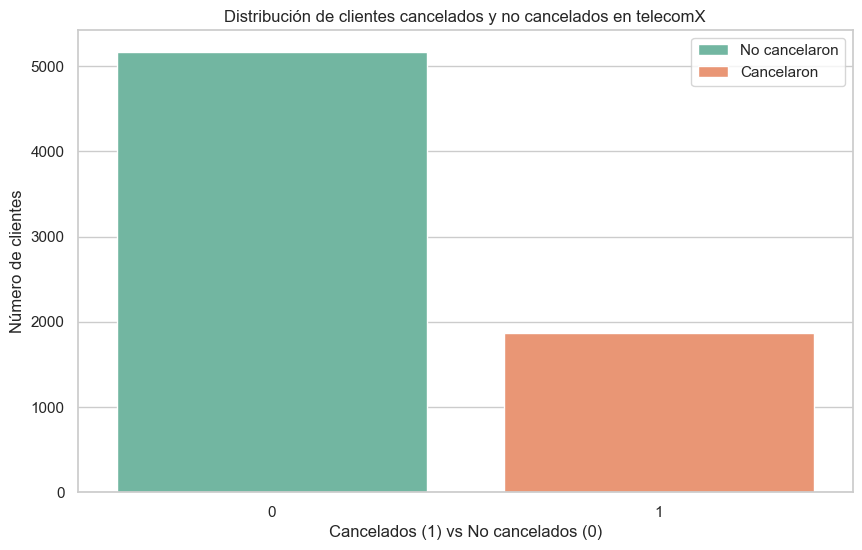

In [ ]:
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)
sns.countplot(x="Cancelacion", data=telecom, order=telecom["Cancelacion"].value_counts().index, palette="Set2")
plt.xlabel("Cancelados (1) vs No cancelados (0)")
plt.ylabel("Número de clientes")
plt.legend(["No cancelaron", "Cancelaron"])
plt.title("Distribución de clientes que no cancelaron en telecomX")
plt.show()



#### Recuento de Evasion por Variable Categorica

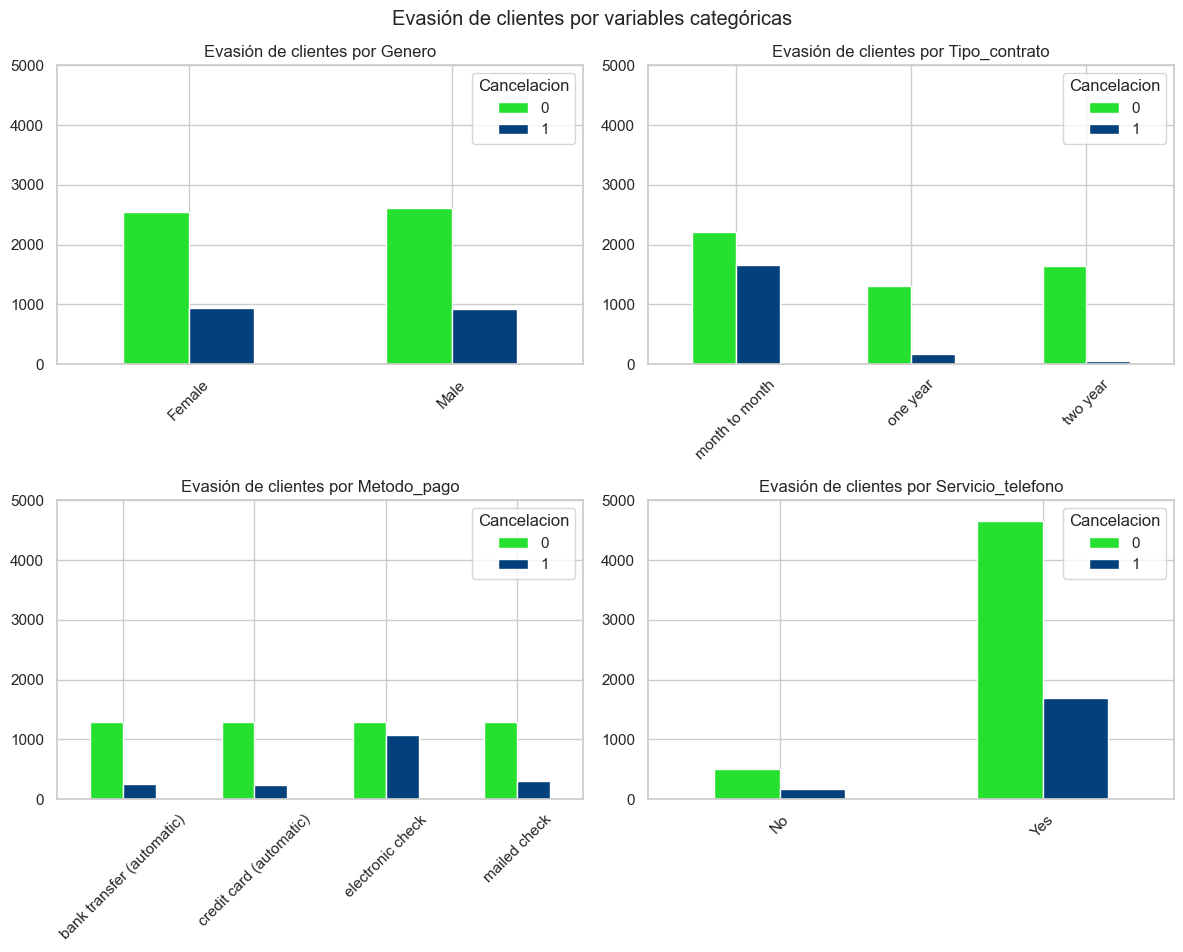

In [56]:
bar_columns = ["Genero", "Tipo_contrato", "Metodo_pago", "Servicio_telefono"]

fig, ax = plt.subplots(2, 2, figsize=(12, 10))
fig.suptitle("Evasión de clientes por variables categóricas")
axes = ax.flatten()

for i, col in enumerate(bar_columns):
    cross = pd.crosstab(telecom[col], telecom["Cancelacion"])
    cross.plot(kind="bar", ax=axes[i], rot=45, color=["#26e030", "#04407c"])
    axes[i].set_title(f"Evasión de clientes por {bar_columns[i]}")
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")
    axes[i].set_ylim(0, 5000)
    axes[i].legend(title="Cancelacion", labels=["0", "1"])

#plt.savefig("img/Evasion_de_clientes_por_variables_categoricas.png")
plt.tight_layout(rect=[0, 0.03, 1, 1])
plt.show()

#📄Informe final